In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2)

In [4]:
X

array([[-0.63304895,  0.34797449],
       [ 0.93255892,  0.04725601],
       [ 0.20671042, -0.08500529],
       ...,
       [-0.30492984,  0.97082541],
       [ 0.89019201,  0.43136557],
       [ 1.20918347, -0.2889173 ]])

In [5]:
df = pd.DataFrame(columns=["x", "y", "target"], data=np.c_[X, y])

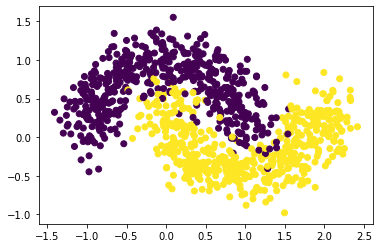

In [6]:
plt.scatter(df["x"], df["y"], c=df["target"])

In [7]:
poly_kernel_svm = Pipeline((
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=3, coef0=1, C=5))
))

In [8]:
poly_kernel_svm.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

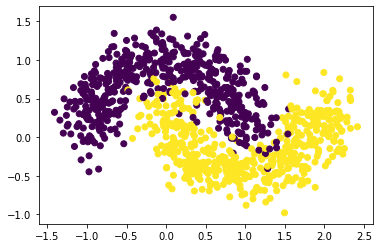

In [9]:
plt.scatter(df["x"], df["y"], c=df["target"])

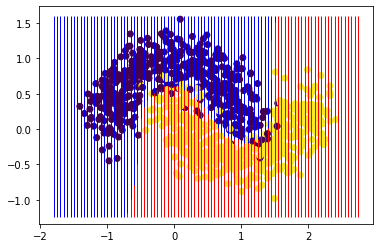

In [10]:
for x_vis in np.arange(-1.8, 2.8, 0.05):
    for y_vis in np.arange(-1.2, 1.6, 0.05):
        plt.plot(x_vis, y_vis, "b|" if poly_kernel_svm.predict([[x_vis, y_vis]])[0] == 0 else "r|")
        
plt.scatter(df["x"], df["y"], c=df["target"])

In [11]:
def make_prediction_graph(deg, c, k="poly"):
    
    svm_pipeline = Pipeline((
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel=k, degree=deg, C=c, coef0=1))
    ))
    
    svm_pipeline.fit(X, y)
    
    for x_vis in np.arange(-1.8, 2.8, 0.05):
        for y_vis in np.arange(-1.2, 1.6, 0.05):
            plt.plot(x_vis, y_vis, "b|" if svm_pipeline.predict([[x_vis, y_vis]])[0] == 0 else "r|")
        
    plt.scatter(df["x"], df["y"], c=df["target"])
    plt.show()

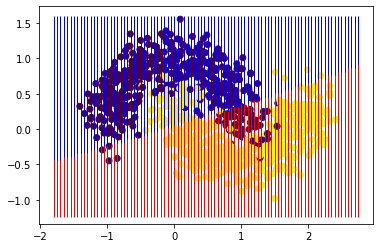

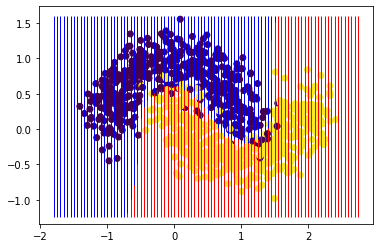

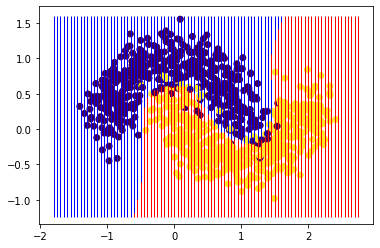

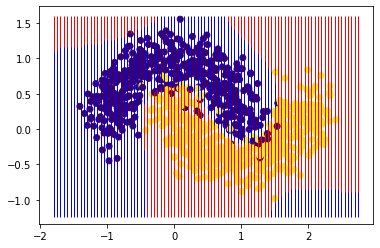

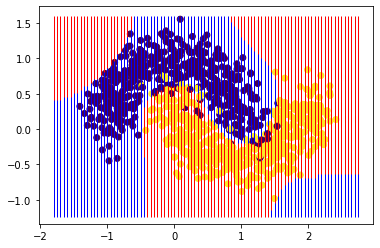

In [12]:
for deg in range(2, 6):
    make_prediction_graph(deg, 5)